# I Lecture des fichiers excel

## Première tentative de code de lecture

In [1]:
import pandas as pd
import numpy as np
from math import *
import statistics

In [2]:
pip install xlrd


The following command must be run outside of the IPython shell:

    $ pip install xlrd

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [3]:
import xlrd

In [5]:
pres_2012 = xlrd.open_workbook('participation_2012_datagouv.xls')

FileNotFoundError: [Errno 2] No such file or directory: 'participation_2012_datagouv.xls'

In [ ]:
print("Nombre de feuilles: "+str(pres_2012.nsheets))
print("Nombre de feuilles: "+str(pres_2012.sheet_names()))

In [ ]:
dep_t1 = pres_2012.sheet_by_name("Départements T1")

In [ ]:
print("Format de la feuille 1:")
print("Nom: "+str(dep_t1.name))
print("Nombre de lignes: "+str(dep_t1.nrows))
print("Nombre de colonnes: "+str(dep_t1.ncols))

In [ ]:
cols_dep_t1 = dep_t1.ncols
rows = dep_t1.nrows

N'aboutit pas (je n'arrive pas à me balader dans le fichier excel)

### Deuxième tentative de code de lecture moins puissant

On tire l'abstention par département pour la présidentielle de 2012 au tour 1 et au tour 2

In [4]:
presi_2012 = pd.read_excel('participation_2012_datagouv.xls')

In [5]:
xls = pd.ExcelFile('participation_2012_datagouv.xls')

In [6]:
xls.sheet_names

['France entière T1T2',
 'Régions T1',
 'Régions T2',
 'Départements T1',
 'Départements T2',
 'Circo leg T1',
 'Circo leg T2',
 'Cantons T1',
 'Cantons T2']

In [7]:
depa_t1_2012 = pd.read_excel('participation_2012_datagouv.xls', sheet_name = "Départements T1")
depa_t2_2012 = pd.read_excel('participation_2012_datagouv.xls', sheet_name = "Départements T2")

In [8]:
depa_t2_2012.rename(columns = {'Abstentions' : 'Abstentions_t2', '% Abs/Ins' : '% Abs/Ins_t2'}, inplace = True)
depa_t1_2012.rename(columns = {'Abstentions' : 'Abstentions_t1', '% Abs/Ins' : '% Abs/Ins_t1'}, inplace = True)
depa_t1_2012.drop(depa_t1_2012.index[96:],0,inplace=True)
depa_t2_2012.drop(depa_t2_2012.index[96:],0,inplace=True)

In [9]:
depa_t2_2012

,Code du département,Libellé du département,Inscrits,Abstentions_t2,% Abs/Ins_t2,Votants,% Vot/Ins,Blancs et nuls,% BlNuls/Ins,% BlNuls/Vot,...,Prénom,Voix,% Voix/Ins,% Voix/Exp,Sexe.1,Nom.1,Prénom.1,Voix.1,% Voix/Ins.1,% Voix/Exp.1
0,1,AIN,393866,67279.0,17.08,326587.0,82.92,19513.0,4.95,5.97,...,François,131333.0,33.34,42.77,M,SARKOZY,Nicolas,175741.0,44.62,57.23
1,2,AISNE,376073,73997.0,19.68,302076.0,80.32,21056.0,5.60,6.97,...,François,147260.0,39.16,52.40,M,SARKOZY,Nicolas,133760.0,35.57,47.60
2,3,ALLIER,256211,45079.0,17.59,211132.0,82.41,14924.0,5.82,7.07,...,François,111615.0,43.56,56.89,M,SARKOZY,Nicolas,84593.0,33.02,43.11
3,4,ALPES DE HAUTE PROVENCE,123895,20314.0,16.40,103581.0,83.60,6639.0,5.36,6.41,...,François,49498.0,39.95,51.06,M,SARKOZY,Nicolas,47444.0,38.29,48.94
4,5,HAUTES ALPES,106875,17470.0,16.35,89405.0,83.65,6025.0,5.64,6.74,...,François,42435.0,39.71,50.89,M,SARKOZY,Nicolas,40945.0,38.31,49.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,91,ESSONNE,767568,140116.0,18.25,627452.0,81.75,32930.0,4.29,5.25,...,François,317663.0,41.39,53.43,M,SARKOZY,Nicolas,276859.0,36.07,46.57
92,92,HAUTS DE SEINE,939121,162051.0,17.26,777070.0,82.74,31126.0,3.31,4.01,...,François,369128.0,39.31,49.48,M,SARKOZY,Nicolas,376816.0,40.12,50.52
93,93,SEINE SAINT-DENIS,740925,174541.0,23.56,566384.0,76.44,25562.0,3.45,4.51,...,François,353260.0,47.68,65.32,M,SARKOZY,Nicolas,187562.0,25.31,34.68
94,94,VAL DE MARNE,767965,150029.0,19.54,617936.0,80.46,27689.0,3.61,4.48,...,François,333347.0,43.41,56.48,M,SARKOZY,Nicolas,256900.0,33.45,43.52


In [10]:
df1_2012 = depa_t1_2012[['Code du département', 'Libellé du département', 'Abstentions_t1', '% Abs/Ins_t1', 'Inscrits']]
df2_2012 = depa_t2_2012[['Abstentions_t2', '% Abs/Ins_t2']]
depa_t1t2_2012 = pd.concat([df1_2012,df2_2012], axis = 1)
depa_t1t2_2012['Année'] = 2012
depa_t1t2_2012['Abs_nat_t1'] = (depa_t1t2_2012['Abstentions_t1'].sum()*100) / depa_t1t2_2012['Inscrits'].sum()
depa_t1t2_2012['Abs_nat_t2'] = (depa_t1t2_2012['Abstentions_t2'].sum()*100) / depa_t1t2_2012['Inscrits'].sum()
depa_t1t2_2012['Abs_nat'] = statistics.mean([depa_t1t2_2012['Abs_nat_t1'][0], depa_t1t2_2012['Abs_nat_t2'][0]])
len(depa_t1t2_2012)

96

On tire l'abstention de 2017 au tour 1 et au tour 2

In [11]:
pres_t1_2017 = pd.read_excel('participation_2017_tour1_datagouv.xls')
pres_t2_2017 = pd.read_excel('participation_2017_tour2_datagouv.xls')

In [12]:
xls_1 = pd.ExcelFile('participation_2017_tour1_datagouv.xls')
xls_2 = pd.ExcelFile('participation_2017_tour2_datagouv.xls')

In [13]:
print(xls_1.sheet_names)
print(xls_2.sheet_names)

['FE Metro OM Tour 1', 'Régions Tour 1', 'Départements Tour 1', 'Circo. Leg. Tour 1', 'Canton Tour 1']
['FE Metro OM Tour 2', 'Régions Tour 2', 'Départements Tour 2', 'Circo. Leg. Tour 2', 'Canton Tour 2']


In [14]:
depa_t1_2017 = pd.read_excel('participation_2017_tour1_datagouv.xls', sheet_name = "Départements Tour 1")
depa_t2_2017 = pd.read_excel('participation_2017_tour2_datagouv.xls', sheet_name = "Départements Tour 2")
len(depa_t1_2017)

107

In [15]:
depa_t2_2017.rename(columns = {'Abstentions' : 'Abstentions_t2', '% Abs/Ins' : '% Abs/Ins_t2'}, inplace = True)
depa_t1_2017.rename(columns = {'Abstentions' : 'Abstentions_t1', '% Abs/Ins' : '% Abs/Ins_t1'}, inplace = True)

In [16]:
depa_t2_2017.drop(depa_t2_2017.index[96:],0,inplace=True)
depa_t1_2017.drop(depa_t1_2017.index[96:],0,inplace=True)

In [17]:
depa_t1_2017

,Code du département,Libellé du département,Inscrits,Abstentions_t1,% Abs/Ins_t1,Votants,% Vot/Ins,Blancs,% Blancs/Ins,% Blancs/Vot,...,Prénom.9,Voix.9,% Voix/Ins.9,% Voix/Exp.9,Sexe.10,Nom.10,Prénom.10,Voix.10,% Voix/Ins.10,% Voix/Exp.10
0,1,Ain,415886,81507,19.60,334379,80.40,6342,1.52,1.90,...,Nathalie,1842,0.44,0.57,M,CHEMINADE,Jacques,595,0.14,0.18
1,2,Aisne,375752,80183,21.34,295569,78.66,5047,1.34,1.71,...,François,2171,0.58,0.75,M,CHEMINADE,Jacques,536,0.14,0.19
2,3,Allier,253508,54275,21.41,199233,78.59,4335,1.71,2.18,...,François,1422,0.56,0.74,M,CHEMINADE,Jacques,353,0.14,0.18
3,4,Alpes-de-Haute-Provence,126578,24323,19.22,102255,80.78,1808,1.43,1.77,...,Nathalie,521,0.41,0.52,M,CHEMINADE,Jacques,205,0.16,0.21
4,5,Hautes-Alpes,109907,20821,18.94,89086,81.06,1541,1.40,1.73,...,Nathalie,411,0.37,0.47,M,CHEMINADE,Jacques,165,0.15,0.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,91,Essonne,795227,157440,19.80,637787,80.20,10240,1.29,1.61,...,Nathalie,2924,0.37,0.47,M,CHEMINADE,Jacques,1241,0.16,0.20
92,92,Hauts-de-Seine,986730,176715,17.91,810015,82.09,12689,1.29,1.57,...,Nathalie,2447,0.25,0.31,M,CHEMINADE,Jacques,1345,0.14,0.17
93,93,Seine-Saint-Denis,766894,210952,27.51,555942,72.49,10148,1.32,1.83,...,Jean,3160,0.41,0.58,M,CHEMINADE,Jacques,1088,0.14,0.20
94,94,Val-de-Marne,785540,164068,20.89,621472,79.11,9925,1.26,1.60,...,Nathalie,2749,0.35,0.45,M,CHEMINADE,Jacques,1066,0.14,0.18


In [18]:
df1_2017 = depa_t1_2017[['Code du département', 'Libellé du département', 'Abstentions_t1', '% Abs/Ins_t1', 'Inscrits']]
df2_2017 = depa_t2_2017[['Abstentions_t2', '% Abs/Ins_t2']]
depa_t1t2_2017 = pd.concat([df1_2017,df2_2017], axis = 1)
depa_t1t2_2017['Année'] = 2017
depa_t1t2_2017['Abs_nat_t1'] = (depa_t1t2_2017['Abstentions_t1'].sum()*100) / depa_t1t2_2017['Inscrits'].sum()
depa_t1t2_2017['Abs_nat_t2'] = (depa_t1t2_2017['Abstentions_t2'].sum()*100) / depa_t1t2_2017['Inscrits'].sum()
depa_t1t2_2017['Abs_nat'] = statistics.mean([depa_t1t2_2017['Abs_nat_t1'][0], depa_t1t2_2017['Abs_nat_t2'][0]])
depa_t1t2_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 95
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code du département     96 non-null     object 
 1   Libellé du département  96 non-null     object 
 2   Abstentions_t1          96 non-null     int64  
 3   % Abs/Ins_t1            96 non-null     float64
 4   Inscrits                96 non-null     int64  
 5   Abstentions_t2          96 non-null     int64  
 6   % Abs/Ins_t2            96 non-null     float64
 7   Année                   96 non-null     int64  
 8   Abs_nat_t1              96 non-null     float64
 9   Abs_nat_t2              96 non-null     float64
 10  Abs_nat                 96 non-null     float64
dtypes: float64(5), int64(4), object(2)
memory usage: 11.1+ KB


On tire l'abstention de 2007 au tour 1 et au tour 2

In [19]:
pres_2007 = pd.read_excel('participation_2007_datagouv.xls')

In [20]:
xls = pd.ExcelFile('participation_2007_datagouv.xls')
xls.sheet_names

['France entière T1T2',
 'Régions T1',
 'Régions T2',
 'Départements T1',
 'Départements T2',
 'Circo leg T1',
 'Circo leg T2',
 'Cantons T1',
 'Cantons T2']

In [21]:
depa_t1_2007 = pd.read_excel('participation_2007_datagouv.xls', sheet_name = "Départements T1")
depa_t2_2007 = pd.read_excel('participation_2007_datagouv.xls', sheet_name = "Départements T2")
depa_t2_2007.rename(columns = {'Abstentions' : 'Abstentions_t2', '% Abs/Ins' : '% Abs/Ins_t2'}, inplace = True)
depa_t1_2007.rename(columns = {'Abstentions' : 'Abstentions_t1', '% Abs/Ins' : '% Abs/Ins_t1'}, inplace = True)

In [22]:
depa_t1_2007.drop(depa_t1_2007.index[96:],0,inplace=True)
depa_t2_2007.drop(depa_t2_2007.index[96:],0,inplace=True)

In [23]:
df1_2007 = depa_t1_2007[['Code du département', 'Libellé du département', 'Abstentions_t1', '% Abs/Ins_t1', 'Inscrits']]
df2_2007 = depa_t2_2007[['Abstentions_t2', '% Abs/Ins_t2']]
depa_t1t2_2007 = pd.concat([df1_2007,df2_2007], axis = 1)
depa_t1t2_2007['Année'] = 2007
depa_t1t2_2007['Abs_nat_t1'] = (depa_t1t2_2007['Abstentions_t1'].sum()*100) / depa_t1t2_2007['Inscrits'].sum()
depa_t1t2_2007['Abs_nat_t2'] = (depa_t1t2_2007['Abstentions_t2'].sum()*100) / depa_t1t2_2007['Inscrits'].sum()
depa_t1t2_2007['Abs_nat'] = statistics.mean([depa_t1t2_2007['Abs_nat_t1'][0], depa_t1t2_2007['Abs_nat_t2'][0]])
depa_t1t2_2007.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 95
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code du département     96 non-null     object 
 1   Libellé du département  96 non-null     object 
 2   Abstentions_t1          96 non-null     int64  
 3   % Abs/Ins_t1            96 non-null     object 
 4   Inscrits                96 non-null     int64  
 5   Abstentions_t2          96 non-null     int64  
 6   % Abs/Ins_t2            96 non-null     object 
 7   Année                   96 non-null     int64  
 8   Abs_nat_t1              96 non-null     float64
 9   Abs_nat_t2              96 non-null     float64
 10  Abs_nat                 96 non-null     float64
dtypes: float64(3), int64(4), object(4)
memory usage: 11.1+ KB


On tire l'abstention de 2002 au tour 1 et au tour 2

In [24]:
pres_2002 = pd.read_excel('participation_2002_datagouv.xls')
xls = pd.ExcelFile('participation_2002_datagouv.xls')
xls.sheet_names

['France entière T1T2',
 'Régions T1',
 'Régions T2',
 'Départements T1',
 'Départements T2',
 'Circo leg T1',
 'Circo leg T2',
 'Cantons T1',
 'Cantons T2']

In [25]:
depa_t1_2002 = pd.read_excel('participation_2002_datagouv.xls', sheet_name = "Départements T1")
depa_t2_2002 = pd.read_excel('participation_2002_datagouv.xls', sheet_name = "Départements T2")
depa_t2_2002.rename(columns = {'Abstentions' : 'Abstentions_t2', '% Abs/Ins' : '% Abs/Ins_t2'}, inplace = True)
depa_t1_2002.rename(columns = {'Abstentions' : 'Abstentions_t1', '% Abs/Ins' : '% Abs/Ins_t1'}, inplace = True)

In [26]:
depa_t1_2002.drop(depa_t1_2002.index[96:],0,inplace=True)
depa_t2_2002.drop(depa_t2_2002.index[96:],0,inplace=True)

In [27]:
df1_2002 = depa_t1_2002[['Code du département', 'Libellé du département', 'Abstentions_t1', '% Abs/Ins_t1', 'Inscrits']]
df2_2002 = depa_t2_2002[['Abstentions_t2', '% Abs/Ins_t2']]
depa_t1t2_2002 = pd.concat([df1_2002,df2_2002], axis = 1)
depa_t1t2_2002['Année'] = 2002
depa_t1t2_2002['Abs_nat_t1'] = (depa_t1t2_2002['Abstentions_t1'].sum()*100) / depa_t1t2_2002['Inscrits'].sum()
depa_t1t2_2002['Abs_nat_t2'] = (depa_t1t2_2002['Abstentions_t2'].sum()*100) / depa_t1t2_2002['Inscrits'].sum()
depa_t1t2_2002['Abs_nat'] = statistics.mean([depa_t1t2_2002['Abs_nat_t1'][0], depa_t1t2_2002['Abs_nat_t2'][0]])
depa_t1t2_2002

,Code du département,Libellé du département,Abstentions_t1,% Abs/Ins_t1,Inscrits,Abstentions_t2,% Abs/Ins_t2,Année,Abs_nat_t1,Abs_nat_t2,Abs_nat
0,1,AIN,89002.0,26.31,338220,64394,19.04,2002,27.156831,19.052574,23.104703
1,2,AISNE,96157.0,26.21,366810,71788,19.57,2002,27.156831,19.052574,23.104703
2,3,ALLIER,67066.0,26.19,256113,48994,19.13,2002,27.156831,19.052574,23.104703
3,4,ALPES DE HAUTE PROVENCE,26555.0,24.38,108943,18812,17.27,2002,27.156831,19.052574,23.104703
4,5,HAUTES ALPES,23051.0,24.24,95100,16533,17.39,2002,27.156831,19.052574,23.104703
...,...,...,...,...,...,...,...,...,...,...,...
91,91,ESSONNE,216913.0,31.82,681760,129501,18.99,2002,27.156831,19.052574,23.104703
92,92,HAUTS DE SEINE,263074.0,32.27,815173,156240,19.16,2002,27.156831,19.052574,23.104703
93,93,SEINE SAINT-DENIS,224064.0,35.52,630730,147800,23.43,2002,27.156831,19.052574,23.104703
94,94,VAL DE MARNE,224607.0,33.15,677517,137416,20.28,2002,27.156831,19.052574,23.104703


On concatène les 4 datasets 

In [435]:
dep_abs = pd.concat([depa_t1t2_2017, depa_t1t2_2012, depa_t1t2_2007, depa_t1t2_2002], axis = 0)
dep_abs.sort_values(by = 'Année', ascending = False, inplace = True)
dep_abs.reset_index(inplace = True)
dep_abs.drop('index', axis = 1, inplace = True)
dep_abs

,Code du département,Libellé du département,Abstentions_t1,% Abs/Ins_t1,Inscrits,Abstentions_t2,% Abs/Ins_t2,Année,Abs_nat_t1,Abs_nat_t2,Abs_nat
0,1,Ain,81507.0,19.6,415886,93130.0,22.39,2017,19.980885,23.730459,21.855672
1,49,Maine-et-Loire,97038.0,17.04,569425,121568.0,21.36,2017,19.980885,23.730459,21.855672
2,71,Saône-et-Loire,86784.0,21.35,406418,94636.0,23.29,2017,19.980885,23.730459,21.855672
3,70,Haute-Saône,34976.0,19.52,179214,37287.0,20.81,2017,19.980885,23.730459,21.855672
4,69,Rhône,249073.0,21.55,1155604,289848.0,25.08,2017,19.980885,23.730459,21.855672
5,68,Haut-Rhin,110496.0,21.0,526190,128800.0,24.48,2017,19.980885,23.730459,21.855672
6,67,Bas-Rhin,154037.0,20.1,766539,183249.0,23.9,2017,19.980885,23.730459,21.855672
7,66,Pyrénées-Orientales,73984.0,21.27,347914,86711.0,24.93,2017,19.980885,23.730459,21.855672
8,65,Hautes-Pyrénées,34275.0,19.29,177690,40662.0,22.89,2017,19.980885,23.730459,21.855672
9,64,Pyrénées-Atlantiques,97357.0,19.38,502378,110333.0,21.96,2017,19.980885,23.730459,21.855672


In [436]:
dep_abs['% Abs/Ins_t1'].head()

0     19.6
1    17.04
2    21.35
3    19.52
4    21.55
Name: % Abs/Ins_t1, dtype: object

In [437]:
stripped_virgule_t1 = dep_abs['% Abs/Ins_t1'].astype('str')
stripped_virgule_t1 = stripped_virgule_t1.str.replace(',','.')
dep_abs['% Abs/Ins_t1'] = stripped_virgule_t1.astype('float')

In [438]:
dep_abs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code du département     384 non-null    object 
 1   Libellé du département  384 non-null    object 
 2   Abstentions_t1          384 non-null    float64
 3   % Abs/Ins_t1            384 non-null    float64
 4   Inscrits                384 non-null    int64  
 5   Abstentions_t2          384 non-null    float64
 6   % Abs/Ins_t2            384 non-null    object 
 7   Année                   384 non-null    int64  
 8   Abs_nat_t1              384 non-null    float64
 9   Abs_nat_t2              384 non-null    float64
 10  Abs_nat                 384 non-null    float64
dtypes: float64(6), int64(2), object(3)
memory usage: 33.1+ KB


In [439]:
len(dep_abs)

384

In [440]:
stripped_virgule_t2 = dep_abs['% Abs/Ins_t2'].astype('str')
stripped_virgule_t2 = stripped_virgule_t2.str.replace(',','.')
dep_abs['% Abs/Ins_t2'] = stripped_virgule_t2.astype('float')

In [441]:
dep_abs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code du département     384 non-null    object 
 1   Libellé du département  384 non-null    object 
 2   Abstentions_t1          384 non-null    float64
 3   % Abs/Ins_t1            384 non-null    float64
 4   Inscrits                384 non-null    int64  
 5   Abstentions_t2          384 non-null    float64
 6   % Abs/Ins_t2            384 non-null    float64
 7   Année                   384 non-null    int64  
 8   Abs_nat_t1              384 non-null    float64
 9   Abs_nat_t2              384 non-null    float64
 10  Abs_nat                 384 non-null    float64
dtypes: float64(7), int64(2), object(2)
memory usage: 33.1+ KB


In [442]:
dep_abs['% Abs/Ins'] = dep_abs[['% Abs/Ins_t1', '% Abs/Ins_t2']].mean(axis = 1)

In [443]:
max(dep_abs['% Abs/Ins'])

37.730000000000004

In [444]:
dep_abs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code du département     384 non-null    object 
 1   Libellé du département  384 non-null    object 
 2   Abstentions_t1          384 non-null    float64
 3   % Abs/Ins_t1            384 non-null    float64
 4   Inscrits                384 non-null    int64  
 5   Abstentions_t2          384 non-null    float64
 6   % Abs/Ins_t2            384 non-null    float64
 7   Année                   384 non-null    int64  
 8   Abs_nat_t1              384 non-null    float64
 9   Abs_nat_t2              384 non-null    float64
 10  Abs_nat                 384 non-null    float64
 11  % Abs/Ins               384 non-null    float64
dtypes: float64(8), int64(2), object(2)
memory usage: 36.1+ KB


A faire pour la suite :
- créer graphique introductif abstention national sur 5 ans (reste stable, comment l'augmenter ?)
- créer carte introductive abstention territorial (les départements ne votent pas du tout autant. Conséquence --> l'île de France a un poids plus élevé que la Lozère dans l'éléction de leur dirigeant. Comment y remédier ?)

# II Première visualisation

In [445]:
%matplotlib inline
import matplotlib.pyplot as plt

Abstention nationale par année depuis 2002

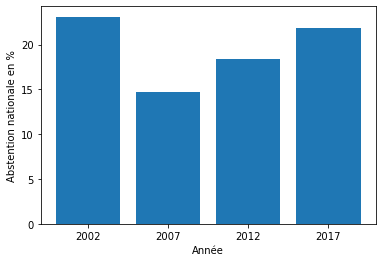

In [446]:
Année = ['2002', '2007', '2012', '2017']
val_2002 = dep_abs['Abs_nat'][dep_abs[dep_abs['Année'] == 2002].index[0]]
val_2007 = dep_abs['Abs_nat'][dep_abs[dep_abs['Année'] == 2007].index[0]]
val_2012 = dep_abs['Abs_nat'][dep_abs[dep_abs['Année'] == 2012].index[0]]
val_2017 = dep_abs['Abs_nat'][dep_abs[dep_abs['Année'] == 2017].index[0]]
Abstention = [val_2002, val_2007, val_2012, val_2017]
plt.bar(Année, Abstention)
plt.ylabel('Abstention nationale en %')
plt.xlabel('Année')
plt.show()

Abstention par département en 2017

Text(0.5, 1.0, 'Abstentions / dep 2017')

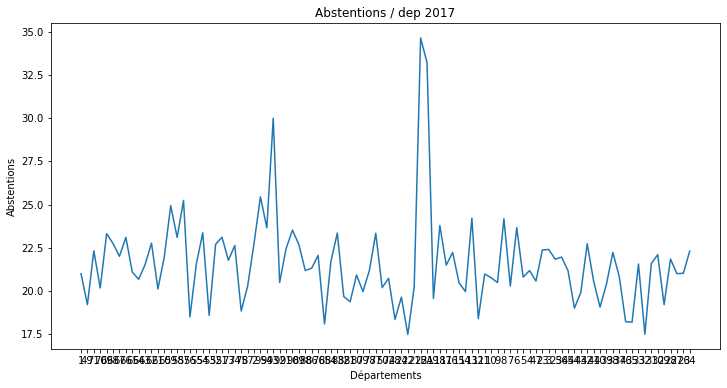

In [447]:
Départements = []
for dep in dep_abs['Code du département'][dep_abs['Année'] == 2017]:
    Départements.append(dep)
Abstentions = []
for ab in dep_abs['% Abs/Ins'][dep_abs['Année'] == 2017]:
    Abstentions.append(ab)

fig, axes = plt.subplots(figsize=(12,6))

axes.plot(Départements, Abstentions)
axes.set_xlabel('Départements')
axes.set_ylabel('Abstentions')
axes.set_title('Abstentions / dep 2017')

In [448]:
len(Départements)

96

Insérer ici les graphiques géographiques que vous avez vu en cours (vous serez plus rapide que moi)

# III Agrégation des données de tendances de votes par département
(Héléna)

On nomme les fichier sur lesquels on va extraire la tendance de vote des départements

In [5]:
trend_t1_2012 = pd.read_excel('participation_2012_datagouv.xls', sheet_name = "Départements T1")
trend_t2_2012 = pd.read_excel('participation_2012_datagouv.xls', sheet_name = "Départements T2")
trend_t1_2017 = pd.read_excel('participation_2017_tour1_datagouv.xls', sheet_name = "Départements Tour 1")
trend_t2_2017 = pd.read_excel('participation_2017_tour2_datagouv.xls', sheet_name = "Départements Tour 2")
trend_t1_2007 = pd.read_excel('participation_2007_datagouv.xls', sheet_name = "Départements T1")
trend_t2_2007 = pd.read_excel('participation_2007_datagouv.xls', sheet_name = "Départements T2")
trend_t1_2002 = pd.read_excel('participation_2002_datagouv.xls', sheet_name = "Départements T1")
trend_t2_2002 = pd.read_excel('participation_2002_datagouv.xls', sheet_name = "Départements T2")

FileNotFoundError: [Errno 2] No such file or directory: 'participation_2012_datagouv.xls'

On donne une valeur à tous les candidats aux élections 2002, 2007, 2012, 2017.

In [ ]:
echelle = {"MACRON": 0 ,"HAMON": -5 ,"LASSALLE": 2 ,"ASSELINEAU": 9 ,"FILLON": 5 ,"JOLY": -7, "LE PEN" : 10, "SARKOZY": 6,"MÉLENCHON" : -9 ,"POUTOU" : -10,"ARTHAUD" : -10,"CHEMINADE" : -5,"BAYROU" : 0,"DUPONT-AIGNAN": 8,"HOLLANDE" : -4 , "MEGRET" : 10 ,"LEPAGE": 0,"GLUCKSTEIN": -7,"CHIRAC": 4,"TAUBIRA": -4,"SAINT-JOSSE": 6,"MAMERE": -8,"JOSPIN": -3,"BOUTIN": 3, "HUE": -2,"CHEVENEMENT": -3,"MADELIN": 3,"LAGUILLER": -10,"BESANCENOT": -8,"BUFFET": -10,"SCHIVARDI": -7,"BOVÉ": -9,"VOYNET": -5,"de VILLIERS": 8,"ROYAL": -2,"NIHOUS": 3}


On code une fonction qui calcule la tendance de vote d'un département, à partir du fichier où sont stoqués les résultats des élections, pour une année et un tour donnés.

In [246]:
def indice_tendance(df, code_dep,echelle,nb_cand):
    #trouver la ligne l du dep dans le dataset
    l = df.loc[df['Code du département'] == code_dep]
    i = 0 #indice de tendance
    tab = l.reset_index().values[0].tolist() # convert en liste

  
    for j in range(nb_cand):
        nom = tab[15+6*j] 
        val = echelle[nom]
        i += val * tab[19+6*j] 
        # les lignes ont toutes la meme structure : le premier nom est en colonne 14, puis le suivant en +6, +6, ...
        # on multiplie la note d'un candidat par le pourcentage de voix parmis les exprimés
    return i*0.01

#On note que pour 2002 :16 , 2007 :12 ,2012 :10 ,2017 :11 candidats


Par exemple, pour laa Corse au tour 1 en 2012 :

In [247]:
indice_tendance(trend_t1_2012, '2A' ,echelle,10)

2.4876

Le fichier 2017 demande une modification de forme

In [249]:
trend_t1_2017.columns
trend_t1_2017.drop(["Nuls", "% Nuls/Ins", "% Nuls/Vot"],axis = 1, inplace = True)


                       Departement  indice_tendance
0                              AIN           1.9692
1                            AISNE           1.9330
2                           ALLIER           0.7043
3          ALPES DE HAUTE PROVENCE           1.0040
4                     HAUTES ALPES           0.8032
5                  ALPES MARITIMES           2.9191
6                          ARDECHE           0.8703
7                         ARDENNES           1.7648
8                           ARIEGE          -0.3798
9                             AUBE           2.6069
10                            AUDE           1.0027
11                         AVEYRON           0.4338
12                BOUCHES DU RHONE           1.6332
13                        CALVADOS           0.9408
14                          CANTAL           1.0144
15                        CHARENTE           0.6308
16               CHARENTE MARITIME           1.1600
17                            CHER           1.0055
18          

In [ ]:
df = pd.DataFrame([i for i in range(384)])

Pour chacune des 4 élections, on calcule la tedance pour chaque département, et on l'ajoute au dataset :

In [ ]:
#on ajoute la colonne

indice_t1_2002 = []
indice_t1_2007 = []
indice_t1_2012 = []
indice_t1_2017 = []

liste_dep =trend_t1_2012['Code du département'].tolist()[:96]

for i in liste_dep: 
    indice_t1_2002 += [indice_tendance(trend_t1_2002, i, echelle,16)]
for i in liste_dep: 
    indice_t1_2007 += [indice_tendance(trend_t1_2007, i, echelle,12)]
for i in liste_dep: 
    indice_t1_2012 += [indice_tendance(trend_t1_2012, i, echelle,10)]
for i in liste_dep: 
    indice_t1_2017 += [indice_tendance(trend_t1_2017, i, echelle,11)]

indice = indice_t1_2002 + indice_t1_2007 + indice_t1_2012 + indice_t1_2017

df['indice_tendance'] = indice

print(df)

In [ ]:
Ajout de la feature "tendance du gouvernement au pouvoir avant l'éléction"



In [ ]:
tendance_précédante = [3 for k in range(96)] + [3 for k in range(96)] + [6 for k in range(96)] + [-4 for k in range(96)]
#-4 car avant 2017,Hollande ie -4
df['tendance_précédante'] = tendance_précédante
print(df)


Ajout de la feature ecart entre la tendance du departement et la tendance du gouvernement au pouvoir au moment de l'élection.

In [ ]:
df['ecart_a_la_tendance'] = df['indice_tendance']- df['tendance_précédante'] 
print(df)


# IV Ajout de certaines features socio-économiques

### Création d'un dataframe pour la pop active qu'on rajoute à dep_abs

In [449]:
dep_test = dep_abs

In [450]:
pop_active_dep = pd.read_excel('pop_active_dep.xls')
xls_1 = pd.ExcelFile('pop_active_dep.xls')
print(xls_1.sheet_names)

['Présentation', 'Documentation', 'Modifications_territoriales', 'DEP_1968', 'Feuil1', 'DEP_1975', 'DEP_1982', 'DEP_1990', 'DEP_1999', 'DEP_2007', 'DEP_2012', 'DEP_2017', 'COM_1968', 'COM_1975', 'COM_1982', 'COM_1990', 'COM_1999', 'COM_2007', 'COM_2012', 'COM_2017']


In [451]:
pop_active_dep_2017 = pd.read_excel('pop_active_dep.xls', sheet_name = "DEP_2017")
pop_active_dep_2012 = pd.read_excel('pop_active_dep.xls', sheet_name = "DEP_2012")
pop_active_dep_2007 = pd.read_excel('pop_active_dep.xls', sheet_name = "DEP_2007")

In [452]:
pop_active_dep_2017.drop(pop_active_dep_2017.index[96:],0,inplace=True)
pop_active_dep_2012.drop(pop_active_dep_2012.index[96:],0,inplace=True)
pop_active_dep_2007.drop(pop_active_dep_2007.index[96:],0,inplace=True)

In [453]:
pop_active_dep_2017.rename(columns={'Hommes\nActifs ayant un emploi\nRP2017': 'Hommes actifs ayant un emplois', 'Hommes\nChômeurs\nRP2017': 'Hommes chômeurs', 'Femmes\nActifs ayant un emploi\nRP2017' : 'Femmes actifs ayant un emploi', 'Femmes\nChômeurs\nRP2017' : 'Femmes chomeurs'}, inplace = True)
pop_active_dep_2012.rename(columns={'Hommes\nActifs ayant un emploi\nRP2012': 'Hommes actifs ayant un emplois', 'Hommes\nChômeurs\nRP2012': 'Hommes chômeurs', 'Femmes\nActifs ayant un emploi\nRP2012' : 'Femmes actifs ayant un emploi', 'Femmes\nChômeurs\nRP2012' : 'Femmes chomeurs'}, inplace = True)
pop_active_dep_2007.rename(columns={'Hommes\nActifs ayant un emploi\nRP2007': 'Hommes actifs ayant un emplois', 'Hommes\nChômeurs\nRP2007': 'Hommes chômeurs', 'Femmes\nActifs ayant un emploi\nRP2007' : 'Femmes actifs ayant un emploi', 'Femmes\nChômeurs\nRP2007' : 'Femmes chomeurs'}, inplace = True)
pop_active_dep_2017['Année de contrôle'] = 2017
pop_active_dep_2012['Année de contrôle'] = 2012
pop_active_dep_2007['Année de contrôle'] = 2007

In [454]:
pop_active_dep_2007.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 95
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Région                          96 non-null     int64  
 1   Département                     96 non-null     object 
 2   Libellé de
département          96 non-null     object 
 3   Hommes actifs ayant un emplois  96 non-null     float64
 4   Hommes chômeurs                 96 non-null     float64
 5   Femmes actifs ayant un emploi   96 non-null     float64
 6   Femmes chomeurs                 96 non-null     float64
 7   Année de contrôle               96 non-null     int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 6.8+ KB


In [456]:
pop_active = pd.concat([pop_active_dep_2017, pop_active_dep_2012, pop_active_dep_2007], axis = 0)
pop_active.sort_values(by = 'Année de contrôle', ascending = False, inplace = True)
pop_active.reset_index(inplace = True)
pop_active.drop('index', axis = 1, inplace = True)
pop_active.drop(['Libellé de\ndépartement', 'Département', 'Région'], axis = 1, inplace = True)
pop_active.columns

Index(['Hommes actifs ayant un emplois', 'Hommes chômeurs',
       'Femmes actifs ayant un emploi', 'Femmes chomeurs',
       'Année de contrôle'],
      dtype='object')

In [457]:
dep_abs = pd.concat([dep_test, pop_active], axis = 1)
dep_abs.drop('Année de contrôle', axis = 1, inplace = True)
dep_abs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Code du département             384 non-null    object 
 1   Libellé du département          384 non-null    object 
 2   Abstentions_t1                  384 non-null    float64
 3   % Abs/Ins_t1                    384 non-null    float64
 4   Inscrits                        384 non-null    int64  
 5   Abstentions_t2                  384 non-null    float64
 6   % Abs/Ins_t2                    384 non-null    float64
 7   Année                           384 non-null    int64  
 8   Abs_nat_t1                      384 non-null    float64
 9   Abs_nat_t2                      384 non-null    float64
 10  Abs_nat                         384 non-null    float64
 11  % Abs/Ins                       384 non-null    float64
 12  Hommes actifs ayant un emplois  288 

On rajoute des colonnes sur la moyenne des chômeurs Femmes, Hommes et totales

In [458]:
dep_abs['pop active ayant un emploi'] = dep_abs[['Hommes actifs ayant un emplois', 'Femmes actifs ayant un emploi']].mean(axis = 1)
dep_abs['pop chômeurs'] = dep_abs[['Hommes chômeurs', 'Femmes chomeurs']].mean(axis = 1)
dep_abs

,Code du département,Libellé du département,Abstentions_t1,% Abs/Ins_t1,Inscrits,Abstentions_t2,% Abs/Ins_t2,Année,Abs_nat_t1,Abs_nat_t2,Abs_nat,% Abs/Ins,Hommes actifs ayant un emplois,Hommes chômeurs,Femmes actifs ayant un emploi,Femmes chomeurs,pop active ayant un emploi,pop chômeurs
0,1,Ain,81507.0,19.60,415886,93130.0,22.39,2017,19.980885,23.730459,21.855672,20.995,113128.924731,9710.095614,102942.302884,11837.796424,108035.613808,10773.946019
1,49,Maine-et-Loire,97038.0,17.04,569425,121568.0,21.36,2017,19.980885,23.730459,21.855672,19.200,128308.580269,13930.328937,120777.678493,16347.399958,124543.129381,15138.864448
2,71,Saône-et-Loire,86784.0,21.35,406418,94636.0,23.29,2017,19.980885,23.730459,21.855672,22.320,77478.125904,13467.847594,69181.374652,13684.273197,73329.750278,13576.060396
3,70,Haute-Saône,34976.0,19.52,179214,37287.0,20.81,2017,19.980885,23.730459,21.855672,20.165,37017.810612,3917.825776,32911.318462,4928.301817,34964.564537,4423.063796
4,69,Rhône,249073.0,21.55,1155604,289848.0,25.08,2017,19.980885,23.730459,21.855672,23.315,301315.540633,35379.497507,284708.461510,39905.752406,293012.001072,37642.624956
5,68,Haut-Rhin,110496.0,21.00,526190,128800.0,24.48,2017,19.980885,23.730459,21.855672,22.740,123838.837915,16450.503115,113200.870874,16544.497099,118519.854394,16497.500107
6,67,Bas-Rhin,154037.0,20.10,766539,183249.0,23.90,2017,19.980885,23.730459,21.855672,22.000,186347.107680,21105.488530,175340.753562,22272.211302,180843.930621,21688.849916
7,66,Pyrénées-Orientales,73984.0,21.27,347914,86711.0,24.93,2017,19.980885,23.730459,21.855672,23.100,59070.567205,11818.705325,57468.618058,13240.185237,58269.592631,12529.445281
8,65,Hautes-Pyrénées,34275.0,19.29,177690,40662.0,22.89,2017,19.980885,23.730459,21.855672,21.090,30906.055815,4052.873960,30433.799832,4602.273208,30669.927824,4327.573584
9,64,Pyrénées-Atlantiques,97357.0,19.38,502378,110333.0,21.96,2017,19.980885,23.730459,21.855672,20.670,103459.349176,11301.288792,99163.503139,13741.282958,101311.426157,12521.285875


### Création d'un dataframe pour la population par grande classe d'âge (très important)

In [374]:
age_pop_dep = pd.read_excel('age_pop_dep.xlsx')
xls_1 = pd.ExcelFile('age_pop_dep.xlsx')
print(xls_1.sheet_names)

['À savoir', '2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000', '1999', '1998', '1997', '1996', '1995', '1994', '1993', '1992', '1991', '1990', '1989', '1988', '1987', '1986', '1985', '1984', '1983', '1982', '1981', '1980', '1979', '1978', '1977', '1976', '1975']


In [375]:
age_pop_dep_2017 = pd.read_excel('age_pop_dep.xlsx', sheet_name = "2017")
age_pop_dep_2012 = pd.read_excel('age_pop_dep.xlsx', sheet_name = "2012")
age_pop_dep_2007 = pd.read_excel('age_pop_dep.xlsx', sheet_name = "2007")
age_pop_dep_2002 = pd.read_excel('age_pop_dep.xlsx', sheet_name = "2002")

In [376]:
age_pop_dep_2017.drop(age_pop_dep_2017.index[96:],0,inplace=True)
age_pop_dep_2012.drop(age_pop_dep_2012.index[96:],0,inplace=True)
age_pop_dep_2007.drop(age_pop_dep_2007.index[96:],0,inplace=True)
age_pop_dep_2002.drop(age_pop_dep_2002.index[96:],0,inplace=True)


In [377]:
age_pop_dep_2002['Année de contrôle'] = 2002
age_pop_dep_2007['Année de contrôle'] = 2007
age_pop_dep_2012['Année de contrôle'] = 2012
age_pop_dep_2017['Année de contrôle'] = 2017

In [378]:
age_pop_dep_2007

,Unnamed: 0,Départements,Ensemble 0 à 19 ans,Ensemble 20 à 39 ans,Ensemble 40 à 59 ans,Ensemble 60 à 74 ans,Ensemble 75 ans et plus,Ensemble Total,H 0 à 19 ans,H 20 à 39 ans,...,F 60 à 74 ans,F 75 ans et plus,F Total,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Année de contrôle
0,01,Ain,153719,147284,163003,68837,41534,574377,78672,74187,...,35341,25909,290626,NaN,NaN,NaN,NaN,NaN,NaN,2007
1,02,Aisne,141079,131304,152341,67757,45339,537820,72302,65638,...,36355,29131,276236,NaN,NaN,NaN,NaN,NaN,NaN,2007
2,03,Allier,71446,74685,97923,56218,42842,343114,36753,37614,...,30300,27055,178643,NaN,NaN,NaN,NaN,NaN,NaN,2007
3,04,Alpes-de-Haute-Provence,35905,32707,45416,25895,16144,156067,18655,15991,...,13573,9897,80498,NaN,NaN,NaN,NaN,NaN,NaN,2007
4,05,Hautes-Alpes,31075,29774,38809,19827,12997,132482,15812,15086,...,10347,7906,67641,NaN,NaN,NaN,NaN,NaN,NaN,2007
5,06,Alpes-Maritimes,239703,256608,292526,169954,123674,1082465,123223,125427,...,92613,78555,572323,NaN,NaN,NaN,NaN,NaN,NaN,2007
6,07,Ardèche,72224,68567,88303,47712,32650,309456,37166,34378,...,24777,20513,158649,NaN,NaN,NaN,NaN,NaN,NaN,2007
7,08,Ardennes,72858,69172,81450,37288,23981,284749,37698,34873,...,19801,15336,145180,NaN,NaN,NaN,NaN,NaN,NaN,2007
8,09,Ariège,32029,31680,43092,23647,18120,148568,16413,15934,...,12389,10935,76136,NaN,NaN,NaN,NaN,NaN,NaN,2007
9,10,Aube,73707,74864,84398,40502,27369,300840,37515,37807,...,21469,17475,154739,NaN,NaN,NaN,NaN,NaN,NaN,2007


In [379]:
age_pop_dep_2002.columns

Index(['Unnamed: 0', 'Départements', 'Ensemble 0 à 19 ans',
       'Ensemble 20 à 39 ans', 'Ensemble 40 à 59 ans', 'Ensemble 60 à 74 ans',
       'Ensemble 75 ans et plus', 'Ensemble Total', 'H 0 à 19 ans',
       'H 20 à 39 ans', ' H 40 à 59 ans', 'H 60 à 74 ans', 'H 75 ans et plus',
       'H Total', 'F 0 à 19 ans', 'F 20 à 39 ans', 'F 40 à 59 ans',
       'F 60 à 74 ans', 'F 75 ans et plus', 'F Total', 'Année de contrôle'],
      dtype='object')

In [380]:
age_pop_dep_2002.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 95
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               96 non-null     object
 1   Départements             96 non-null     object
 2   Ensemble 0 à 19 ans      96 non-null     int64 
 3   Ensemble 20 à 39 ans     96 non-null     int64 
 4   Ensemble 40 à 59 ans     96 non-null     int64 
 5   Ensemble 60 à 74 ans     96 non-null     int64 
 6   Ensemble 75 ans et plus  96 non-null     int64 
 7   Ensemble Total           96 non-null     int64 
 8   H 0 à 19 ans             96 non-null     int64 
 9   H 20 à 39 ans            96 non-null     int64 
 10   H 40 à 59 ans           96 non-null     int64 
 11  H 60 à 74 ans            96 non-null     int64 
 12  H 75 ans et plus         96 non-null     int64 
 13  H Total                  96 non-null     int64 
 14  F 0 à 19 ans             96 non-null     int

In [381]:
age_pop_dep_2002.rename(columns = {' H 40 à 59 ans': 'H 40 à 59 ans'}, inplace = True)

In [382]:
age_pop_dep_2012.columns

Index(['Unnamed: 0', 'Départements', 'Ensemble 0 à 19 ans',
       'Ensemble 20 à 39 ans', 'Ensemble 40 à 59 ans', 'Ensemble 60 à 74 ans',
       'Ensemble 75 ans et plus', 'Ensemble Total', 'H 0 à 19 ans',
       'H 20 à 39 ans', 'H 40 à 59 ans', 'H 60 à 74 ans', 'H 75 ans et plus',
       'H Total', 'F 0 à 19 ans', 'F 20 à 39 ans', 'F 40 à 59 ans',
       'F 60 à 74 ans', 'F 75 ans et plus', 'F Total', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Année de contrôle'],
      dtype='object')

In [383]:
age_pop_dep_2017.columns

Index(['Unnamed: 0', 'Départements', 'Ensemble 0 à 19 ans',
       'Ensemble 20 à 39 ans', 'Ensemble 40 à 59 ans', 'Ensemble 60 à 74 ans',
       'Ensemble 75 ans et plus', 'Ensemble Total', 'H 0 à 19 ans',
       'H 20 à 39 ans', 'H 40 à 59 ans', 'H 60 à 74 ans', 'H 75 ans et plus',
       'H Total', 'F 0 à 19 ans', 'F 20 à 39 ans', 'F 40 à 59 ans',
       'F 60 à 74 ans', 'F 75 ans et plus', 'F Total', 'Année de contrôle'],
      dtype='object')

On concatène les dataframe

In [384]:
age_pop_dep = pd.concat([age_pop_dep_2002, age_pop_dep_2007, age_pop_dep_2012, age_pop_dep_2017], axis = 0)
age_pop_dep.sort_values(by = 'Année de contrôle', ascending = False, inplace = True)
age_pop_dep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 384 entries, 95 to 0
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               384 non-null    object 
 1   Départements             384 non-null    object 
 2   Ensemble 0 à 19 ans      384 non-null    int64  
 3   Ensemble 20 à 39 ans     384 non-null    int64  
 4   Ensemble 40 à 59 ans     384 non-null    int64  
 5   Ensemble 60 à 74 ans     384 non-null    int64  
 6   Ensemble 75 ans et plus  384 non-null    int64  
 7   Ensemble Total           384 non-null    int64  
 8   H 0 à 19 ans             384 non-null    int64  
 9   H 20 à 39 ans            384 non-null    int64  
 10  H 40 à 59 ans            384 non-null    int64  
 11  H 60 à 74 ans            384 non-null    int64  
 12  H 75 ans et plus         384 non-null    int64  
 13  H Total                  384 non-null    int64  
 14  F 0 à 19 ans             38

In [385]:
age_pop_dep.drop(['Unnamed: 0', 'Départements', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'], axis = 1, inplace = True)

In [462]:
age_pop_dep = age_pop_dep.reset_index()
age_pop_dep.drop('index', axis = 1, inplace = True)

In [463]:
dep_test = dep_abs
dep_abs = pd.concat([dep_test, age_pop_dep], axis = 1)
dep_abs.drop('Année de contrôle', axis = 1, inplace = True)
dep_abs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Code du département             384 non-null    object 
 1   Libellé du département          384 non-null    object 
 2   Abstentions_t1                  384 non-null    float64
 3   % Abs/Ins_t1                    384 non-null    float64
 4   Inscrits                        384 non-null    int64  
 5   Abstentions_t2                  384 non-null    float64
 6   % Abs/Ins_t2                    384 non-null    float64
 7   Année                           384 non-null    int64  
 8   Abs_nat_t1                      384 non-null    float64
 9   Abs_nat_t2                      384 non-null    float64
 10  Abs_nat                         384 non-null    float64
 11  % Abs/Ins                       384 non-null    float64
 12  Hommes actifs ayant un emplois  288 

### Création d'un dataframe sur les résultats par bureau de vote dans chaque département

In [464]:
bv_t1t2_2002 = pd.read_csv('bv_t1t2_2002', delimiter = ';')
bv_t1t2_2007 = pd.read_csv('bv_t1t2_2007', delimiter = ';')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [465]:
bv_t1t2_2007 = bv_t1t2_2007.rename_axis('Vrai tour').reset_index()
bv_t1t2_2002 = bv_t1t2_2002.rename_axis('Vrai tour').reset_index()

In [466]:
bv_t1t2_2007.rename(columns = {'Tour' : 'Code département', 'Coded�partement' : 'Code commune', 'Codecommune' : 'Nom commune', 'Nomdelacommune,N�bureaudevote' : 'Numéro bureau de vote'}, inplace = True)
bv_t1t2_2002.rename(columns = {'Tour' : 'Code département', 'Coded�partement' : 'Code commune', 'Codecommune' : 'Nom commune', 'Nomdelacommune,N�bureaudevote' : 'Numéro bureau de vote'}, inplace = True)

In [467]:
bv_t1t2_2007.rename(columns = {'Vrai tour' : 'Tour'}, inplace = True)
bv_t1t2_2002.rename(columns = {'Vrai tour' : 'Tour'}, inplace = True)

In [468]:
bv_t1t2_2007.head()

,Tour,Code département,Code commune,Nom commune,Numéro bureau de vote,Inscrits,Votants,Exprim�s,N�deputducandidat,Nomcandidat,Pr�nomcandidat,Codesiglecandidat,Nombredevoixcandidat
0,1,1,1,L'Abergement-Cl�menciat,0001,596,528,522,5,BOV�,Jos�,BOVE,5
1,1,1,1,L'Abergement-Cl�menciat,0001,596,528,522,2,BUFFET,Marie-George,BUFF,3
2,1,1,1,L'Abergement-Cl�menciat,0001,596,528,522,3,SCHIVARDI,G�rard,SCHI,1
3,1,1,1,L'Abergement-Cl�menciat,0001,596,528,522,11,LAGUILLER,Arlette,LAGU,6
4,1,1,1,L'Abergement-Cl�menciat,0001,596,528,522,7,de VILLIERS,Philippe,VILL,20


In [469]:
bv_t1t2_2007['Code département'] = bv_t1t2_2007['Code département'].astype('string')

In [470]:
bv_t1t2_2007['Code département'].unique()[0:101]

<StringArray>
[ '1',  '2',  '3',  '4',  '5',  '6',  '7',  '8',  '9', '10',
 ...
 '91', '92', '93', '94', '95', 'ZA', 'ZB', 'ZC', 'ZD', 'ZM']
Length: 101, dtype: string

In [471]:
dic_2007 = {}
for code in bv_t1t2_2007['Code département'].unique()[0:101]:
    dic_2007[code] = len(bv_t1t2_2007[bv_t1t2_2007['Code département'] == code]['Numéro bureau de vote'].value_counts())

In [472]:
bv_2007 = pd.DataFrame(list(dic_2007.items()),columns=['Code département','Nombre bureau de vote'])

In [473]:
bv_2007.drop(bv_2007.index[96:],0,inplace=True)
bv_2007['Année de contrôle'] = 2007

In [474]:
bv_t1t2_2002['Code département'] = bv_t1t2_2002['Code département'].astype('string')

In [475]:
bv_t1t2_2002['Code département'].unique()[0:100]

<StringArray>
[ '1',  '2',  '3',  '4',  '5',  '6',  '7',  '8',  '9', '10', '11', '12', '13',
 '14', '15', '16', '17', '18', '19', '2A', '2B', '21', '22', '23', '24', '25',
 '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38',
 '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51',
 '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64',
 '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77',
 '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90',
 '91', '92', '93', '94', '95', 'ZA', 'ZB', 'ZC', 'ZD']
Length: 100, dtype: string

In [476]:
dic_2002 = {}
for code in bv_t1t2_2002['Code département'].unique()[0:100]:
    dic_2002[code] = len(bv_t1t2_2002[bv_t1t2_2002['Code département'] == code]['Numéro bureau de vote'].value_counts())

In [477]:
bv_2002 = pd.DataFrame(list(dic_2002.items()),columns=['Code département','Nombre bureau de vote'])
bv_2002.drop(bv_2002.index[96:],0,inplace=True)
bv_2002['Année de contrôle'] = 2002

In [478]:
bv_t2_2017 = pd.read_csv('bv_t2_2017', delimiter = ';')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [479]:
bv_t2_2017.drop(['Code du d�partement', 'Libell� du d�partement',
       'Code de la circonscription', 'Libell� de la circonscription',
       'Code de la commune', 'Libell� de la commune', 'Code du b.vote',
       'Inscrits', 'Abstentions', '% Abs/Ins', 'Votants', '% Vot/Ins',
       'Blancs', '% Blancs/Ins', '% Blancs/Vot', 'Nuls', '% Nuls/Ins',
       '% Nuls/Vot', 'Exprim�s', '% Exp/Ins', '% Exp/Vot', 'N�Panneau', 'Sexe',
       'Nom', 'Pr�nom', 'Voix', '% Voix/Ins', '% Voix/Exp'], axis = 1, inplace = True)

In [480]:
bv_t2_2017 = bv_t2_2017.reset_index()

In [481]:
bv_t2_2017.rename(columns = {'level_0' : 'Code département', 'level_1':'Libellé département', 'level_2':'Numéro circonscription',
                            'level_3':'Nom circonscription', 'level_4':'Numéro commune', 'level_5':'Nom commun', 'level_6':'Numéro bv'}, inplace = True)

In [482]:
bv_t2_2017['Code département'] = bv_t2_2017['Code département'].astype('string')

In [483]:
bv_t2_2017['Code département'].unique()[0:101]

<StringArray>
['01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
 ...
 '91', '92', '93', '94', '95', 'ZA', 'ZB', 'ZC', 'ZD', 'ZM']
Length: 101, dtype: string

In [484]:
dic_2017 = {}
for code in bv_t2_2017['Code département'].unique()[0:101]:
    dic_2017[code] = len(bv_t2_2017[bv_t2_2017['Code département'] == code]['Numéro bv'].value_counts())

In [485]:
bv_2017 = pd.DataFrame(list(dic_2017.items()),columns=['Code département','Nombre bureau de vote'])
bv_2017.drop(bv_2017.index[96:],0,inplace=True)
bv_2017['Année de contrôle'] = 2017

In [486]:
bv_t1t2_2012 = pd.read_csv('bv_t1t2_2012', delimiter = ';')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1,6,14) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [487]:
bv_t1t2_2012 = bv_t1t2_2012.reset_index()
bv_t1t2_2012.head()

,level_0,level_1,Tour,Coded�partement,Codecommune,Nomdelacommune,N�bureaudevote,Inscrits,Votants,Exprim�s,N�deputducandidat,Nomcandidat,Pr�nomcandidat,Codesiglecandidat,Nombredevoixcandidat
0,1,ZA,101,Les Abymes,1,1,1,476,266,249,2,JOLY,Eva,JOLY,7%�
1,1,ZA,101,Les Abymes,1,1,1,476,266,249,3,LE PEN,Marine,LEPE,12
2,1,ZA,101,Les Abymes,1,1,1,476,266,249,4,SARKOZY,Nicolas,SARK,50
3,1,ZA,101,Les Abymes,1,1,1,476,266,249,5,M�LENCHON,Jean-Luc,MELE,11
4,1,ZA,101,Les Abymes,1,1,1,476,266,249,9,BAYROU,Fran�ois,BAYR,5


In [488]:
bv_t1t2_2012.columns

Index(['level_0', 'level_1', 'Tour', 'Coded�partement', 'Codecommune',
       'Nomdelacommune', 'N�bureaudevote', 'Inscrits', 'Votants', 'Exprim�s',
       'N�deputducandidat', 'Nomcandidat', 'Pr�nomcandidat',
       'Codesiglecandidat', 'Nombredevoixcandidat'],
      dtype='object')

In [489]:
bv_t1t2_2012.drop(['Codecommune',
       'Nomdelacommune','Inscrits', 'Votants', 'Exprim�s',
       'N�deputducandidat', 'Nomcandidat', 'Pr�nomcandidat',
       'Codesiglecandidat', 'Nombredevoixcandidat'], axis = 1, inplace = True)

In [490]:
bv_t1t2_2012.head()

,level_0,level_1,Tour,Coded�partement,N�bureaudevote
0,1,ZA,101,Les Abymes,1
1,1,ZA,101,Les Abymes,1
2,1,ZA,101,Les Abymes,1
3,1,ZA,101,Les Abymes,1
4,1,ZA,101,Les Abymes,1


In [491]:
bv_t1t2_2012.rename(columns = {'level_0':'Tour', 'level_1':'Code département', 'Tour':'Code commune',
                              'Coded�partement':'Nom commune', 'N�bureaudevote': 'Numéro bv'}, inplace = True)

In [492]:
bv_t1t2_2012.head()

,Tour,Code département,Code commune,Nom commune,Numéro bv
0,1,ZA,101,Les Abymes,1
1,1,ZA,101,Les Abymes,1
2,1,ZA,101,Les Abymes,1
3,1,ZA,101,Les Abymes,1
4,1,ZA,101,Les Abymes,1


In [493]:
bv_t1t2_2012['Code département'] = bv_t1t2_2012['Code département'].astype('string')

In [494]:
dic_2012 = {}
for code in bv_t1t2_2012['Code département'].unique():
    dic_2012[code] = len(bv_t1t2_2012[bv_t1t2_2012['Code département'] == code]['Numéro bv'].value_counts())

In [495]:
dic_2012.pop('09')
dic_2012.pop('ZN')
dic_2012.pop('ZP')
dic_2012.pop('ZS')
dic_2012.pop('ZW')
dic_2012.pop('ZX')
dic_2012.pop('ZZ')

2

In [496]:
dic_2012['08'] = 73
dic_2012.pop('8')

13

In [497]:
bv_2012 = pd.DataFrame(list(dic_2012.items()),columns=['Code département','Nombre bureau de vote'])
bv_2012

,Code département,Nombre bureau de vote
0,ZA,104
1,ZB,120
2,ZC,40
3,ZD,248
4,ZM,298
5,01,38
6,02,78
7,03,54
8,04,32
9,05,58


In [498]:
bv_2012.drop(bv_2012.index[:5],inplace=True)
bv_2012['Année de contrôle'] = 2012
bv_2012 = bv_2012.reset_index()

In [499]:
bv_2012.drop('index', axis = 1, inplace = True)

In [500]:
bv_2012

,Code département,Nombre bureau de vote,Année de contrôle
0,01,38,2012
1,02,78,2012
2,03,54,2012
3,04,32,2012
4,05,58,2012
5,06,644,2012
6,07,28,2012
7,08,73,2012
8,9,11,2012
9,10,32,2012


In [501]:
bv = pd.concat([bv_2002, bv_2007, bv_2012, bv_2017], axis = 0)
bv.sort_values(by = 'Année de contrôle', ascending = False, inplace = True)
bv = bv.reset_index()
bv.drop('index', axis = 1, inplace = True)

In [502]:
bv.drop('Code département', axis = 1, inplace = True)

In [503]:
dep_test = dep_abs
dep_abs = pd.concat([dep_test, bv], axis = 1)
dep_abs.drop('Année de contrôle', axis = 1, inplace = True)
dep_abs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Code du département             384 non-null    object 
 1   Libellé du département          384 non-null    object 
 2   Abstentions_t1                  384 non-null    float64
 3   % Abs/Ins_t1                    384 non-null    float64
 4   Inscrits                        384 non-null    int64  
 5   Abstentions_t2                  384 non-null    float64
 6   % Abs/Ins_t2                    384 non-null    float64
 7   Année                           384 non-null    int64  
 8   Abs_nat_t1                      384 non-null    float64
 9   Abs_nat_t2                      384 non-null    float64
 10  Abs_nat                         384 non-null    float64
 11  % Abs/Ins                       384 non-null    float64
 12  Hommes actifs ayant un emplois  288 

### Création d'un dataframe sur le revenu moyen par département

In [504]:
dep_test = dep_abs

In [505]:
rev_dep = pd.read_excel('rev_dep_2017.xlsx')
xls_1 = pd.ExcelFile('rev_dep_2017.xlsx')
rev_dep = pd.read_excel('rev_dep_2017.xlsx', sheet_name = "rev")

In [506]:
rev_dep

,Rang,Département,Revenu fiscal moyen,Année
0,1,Paris,3 596 €,2017
1,2,Hauts-de-Seine,3 503 €,2017
2,3,Yvelines,3 223 €,2017
3,4,Haute-Savoie,2 964 €,2017
4,5,Essonne,2 562 €,2017
5,6,Ain,2 513 €,2017
6,7,Val-de-Marne,2 490 €,2017
7,8,Haut-Rhin,2 477 €,2017
8,9,Rhône,2 438 €,2017
9,10,Seine-et-Marne,2 395 €,2017


In [507]:
rev_dep.drop(['Rang', 'Département', 'Année'], axis = 1, inplace = True)

In [508]:
dep_abs = pd.concat([dep_test, rev_dep], axis = 1)
dep_abs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Code du département             384 non-null    object 
 1   Libellé du département          384 non-null    object 
 2   Abstentions_t1                  384 non-null    float64
 3   % Abs/Ins_t1                    384 non-null    float64
 4   Inscrits                        384 non-null    int64  
 5   Abstentions_t2                  384 non-null    float64
 6   % Abs/Ins_t2                    384 non-null    float64
 7   Année                           384 non-null    int64  
 8   Abs_nat_t1                      384 non-null    float64
 9   Abs_nat_t2                      384 non-null    float64
 10  Abs_nat                         384 non-null    float64
 11  % Abs/Ins                       384 non-null    float64
 12  Hommes actifs ayant un emplois  288 

In [510]:
pd.set_option('display.max_columns', None)
dep_abs.head()

,Code du département,Libellé du département,Abstentions_t1,% Abs/Ins_t1,Inscrits,Abstentions_t2,% Abs/Ins_t2,Année,Abs_nat_t1,Abs_nat_t2,Abs_nat,% Abs/Ins,Hommes actifs ayant un emplois,Hommes chômeurs,Femmes actifs ayant un emploi,Femmes chomeurs,pop active ayant un emploi,pop chômeurs,Ensemble 0 à 19 ans,Ensemble 20 à 39 ans,Ensemble 40 à 59 ans,Ensemble 60 à 74 ans,Ensemble 75 ans et plus,Ensemble Total,H 0 à 19 ans,H 20 à 39 ans,H 40 à 59 ans,H 60 à 74 ans,H 75 ans et plus,H Total,F 0 à 19 ans,F 20 à 39 ans,F 40 à 59 ans,F 60 à 74 ans,F 75 ans et plus,F Total,Nombre bureau de vote,Revenu fiscal moyen
0,1,Ain,81507.0,19.60,415886,93130.0,22.39,2017,19.980885,23.730459,21.855672,20.995,113128.924731,9710.095614,102942.302884,11837.796424,108035.613808,10773.946019,351331,328428,322682,154421,71756,1228618,178917,158372,157402,73915,27305,595911,172414,170056,165280,80506,44451,632707,50,3 596 €
1,49,Maine-et-Loire,97038.0,17.04,569425,121568.0,21.36,2017,19.980885,23.730459,21.855672,19.200,128308.580269,13930.328937,120777.678493,16347.399958,124543.129381,15138.864448,71826,65061,87257,66134,42564,332842,36838,32213,42341,31443,17141,159976,34988,32848,44916,34691,25423,172866,23,3 503 €
2,71,Saône-et-Loire,86784.0,21.35,406418,94636.0,23.29,2017,19.980885,23.730459,21.855672,22.320,77478.125904,13467.847594,69181.374652,13684.273197,73329.750278,13576.060396,134822,132863,137172,85497,48713,539067,69109,67023,68121,40600,19082,263935,65713,65840,69051,44897,29631,275132,106,3 223 €
3,70,Haute-Saône,34976.0,19.52,179214,37287.0,20.81,2017,19.980885,23.730459,21.855672,20.165,37017.810612,3917.825776,32911.318462,4928.301817,34964.564537,4423.063796,124963,110056,135234,90188,51112,511553,64277,54711,66187,42650,20296,248121,60686,55345,69047,47538,30816,263432,41,2 964 €
4,69,Rhône,249073.0,21.55,1155604,289848.0,25.08,2017,19.980885,23.730459,21.855672,23.315,301315.540633,35379.497507,284708.461510,39905.752406,293012.001072,37642.624956,156208,132440,163765,99494,49936,601843,80296,65358,81213,47688,19037,293592,75912,67082,82552,51806,30899,308251,50,2 562 €


# PARTIE 2 : Visualisation

In [18]:
dep_abs = depa_t1_2012 = pd.read_excel('dep_abs_final.xlsx', sheet_name = "Sheet1")

1. Regressions

2. La carte

In [11]:
dep_abs.head()

,Code du département,Libellé du département,Abstentions_t1,% Abs/Ins_t1,Inscrits,Abstentions_t2,% Abs/Ins_t2,Année,Abs_nat_t1,Abs_nat_t2,...,F 40 à 59 ans,F 60 à 74 ans,F 75 ans et plus,F Total,Nombre bureau de vote,Revenu fiscal moyen,Trend_0,Trend_1,Trend_5,Trend_10
0,1,Ain,81507,19.60,415886,93130,22.39,2017,19.980885,23.730459,...,165280,80506,44451,632707,50,3 596 €,3.006635,-7.559632,80.256106,32.105671
1,49,Maine-et-Loire,97038,17.04,569425,121568,21.36,2017,19.980885,23.730459,...,44916,34691,25423,172866,23,3 503 €,3.006635,-7.559632,80.256106,32.105671
2,71,Saône-et-Loire,86784,21.35,406418,94636,23.29,2017,19.980885,23.730459,...,69051,44897,29631,275132,106,3 223 €,3.006635,-7.559632,80.256106,32.105671
3,70,Haute-Saône,34976,19.52,179214,37287,20.81,2017,19.980885,23.730459,...,69047,47538,30816,263432,41,2 964 €,3.006635,-7.559632,80.256106,32.105671
4,69,Rhône,249073,21.55,1155604,289848,25.08,2017,19.980885,23.730459,...,82552,51806,30899,308251,50,2 562 €,3.006635,-7.559632,80.256106,32.105671


In [14]:
dep_abs['% Abs/Ins_t1']
print( min(dep_abs['% Abs/Ins_t1']), max(dep_abs['% Abs/Ins_t1']))

10.98 42.13


On récupère les données géométriques des départements francais

In [4]:
import zipfile
with zipfile.ZipFile("france-geojson-master.zip","r") as zip_ref:
    zip_ref.extractall("map")

In [6]:
import geopandas as gpd
sf = gpd.read_file('map/departements-version-simplifiee.geojson')
sf.head()

,code,nom,geometry
0,01,Ain,"POLYGON ((4.78021 46.17668, 4.79458 46.21832, ..."
1,02,Aisne,"POLYGON ((4.04797 49.40564, 4.03991 49.39740, ..."
2,03,Allier,"POLYGON ((3.03207 46.79491, 3.04907 46.75808, ..."
3,04,Alpes-de-Haute-Provence,"POLYGON ((5.67604 44.19143, 5.69209 44.18648, ..."
4,05,Hautes-Alpes,"POLYGON ((6.26057 45.12685, 6.29922 45.10855, ..."


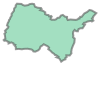

In [7]:
sf.loc[0].geometry

Cela a bien fonctionné.
On fusionne maintenant les deux dataset, puis on supprime les colonnes inutiles.

In [30]:
dep_map = sf.merge(dep_abs, left_on='code', right_on='Code du département', suffixes=('','_y'))
dep_map.head(2)

,code,nom,geometry,value,Code du département,Libellé du département,Abstentions_t1,% Abs/Ins_t1,Inscrits,Abstentions_t2,...,F 40 à 59 ans,F 60 à 74 ans,F 75 ans et plus,F Total,Nombre bureau de vote,Revenu fiscal moyen,Trend_0,Trend_1,Trend_5,Trend_10
0,2A,Corse-du-Sud,"POLYGON ((8.57341 42.38141, 8.59497 42.37044, ...",2,2A,Corse-du-Sud,33758,31.03,108781,38512,...,193781,97285,52909,720553,31,1 977 €,3.006635,-7.559632,80.256106,32.105671
1,2A,Corse-du-Sud,"POLYGON ((8.57341 42.38141, 8.59497 42.37044, ...",2,2A,CORSE SUD,26173,25.74,101682,24675,...,51599,30595,25034,189289,42,1 882 €,3.170762,8.038331,5.458810,90.095945


In [31]:
dep_map.pop('code') 
dep_map.pop('value')
dep_map.pop('nom') 
dep_map.head(2)

,geometry,Code du département,Libellé du département,Abstentions_t1,% Abs/Ins_t1,Inscrits,Abstentions_t2,% Abs/Ins_t2,Année,Abs_nat_t1,...,F 40 à 59 ans,F 60 à 74 ans,F 75 ans et plus,F Total,Nombre bureau de vote,Revenu fiscal moyen,Trend_0,Trend_1,Trend_5,Trend_10
0,"POLYGON ((8.57341 42.38141, 8.59497 42.37044, ...",2A,Corse-du-Sud,33758,31.03,108781,38512,35.41,2017,19.980885,...,193781,97285,52909,720553,31,1 977 €,3.006635,-7.559632,80.256106,32.105671
1,"POLYGON ((8.57341 42.38141, 8.59497 42.37044, ...",2A,CORSE SUD,26173,25.74,101682,24675,24.27,2012,18.627215,...,51599,30595,25034,189289,42,1 882 €,3.170762,8.038331,5.458810,90.095945


In [45]:
!pip install geoviews

  Using cached geoviews-1.9.1-py2.py3-none-any.whl (502 kB)
  Using cached Cartopy-0.19.0.post1.tar.gz (12.1 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  ERROR: Command errored out with exit status 1:
   command: /Users/helenaperrier/anaconda3/bin/python /Users/helenaperrier/anaconda3/lib/python3.6/site-packages/pip/_vendor/pep517/in_process/_in_process.py get_requires_for_build_wheel /var/folders/6s/n9wx8_ks7ss4psh6sblv9_xh0000gn/T/tmp16av5u9h
       cwd: /private/var/folders/6s/n9wx8_ks7ss4psh6sblv9_xh0000gn/T/pip-install-cq659ngt/cartopy_b576772575a4422eb17b44cb76ce937d
  Complete output (3 lines):
  setup.py:120: UserWarning: Unable to determine GEOS version. Ensure you have 3.3.3 or later installed, or installation may fail.
    '.'.join(str(v) for v in GEOS_MIN_VERSION), ))
  Proj 4.9.0 must be installed.
  ----------------------------------------
  Using cached Cartopy-0.18.0.tar.gz (14.4 MB)
  Preparing metadata (setup.py) ... e

  Preparing metadata (setup.py) ... error
  ERROR: Command errored out with exit status 1:
   command: /Users/helenaperrier/anaconda3/bin/python -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/6s/n9wx8_ks7ss4psh6sblv9_xh0000gn/T/pip-install-cq659ngt/cartopy_011ca01a48d3475d81014b86763ba929/setup.py'"'"'; __file__='"'"'/private/var/folders/6s/n9wx8_ks7ss4psh6sblv9_xh0000gn/T/pip-install-cq659ngt/cartopy_011ca01a48d3475d81014b86763ba929/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /private/var/folders/6s/n9wx8_ks7ss4psh6sblv9_xh0000gn/T/pip-pip-egg-info-yb3i9zxg
       cwd: /private/var/folders/6s/n9wx8_ks7ss4psh6sblv9_xh0000gn/T/pip-install-cq659ngt/cartopy_011ca01a48d3475d81014b86763ba929/
  Complete outp

SyntaxError: invalid syntax (<ipython-input-43-36a2e3cf17fc>, line 1)

In [ ]:
map_france = gv.Polygons(dep_map, vdims=['Libellé du département', '% Abs/Ins_t1', '% Abs/Ins_t2'])
regions.opts(width=600, height=600, toolbar='above', color=dim('% Abs/Ins_t1')/50, 
             colorbar=True, tools=['hover'], aspect='equal')